# Data preparation and exploration

In [1]:
# import libraries
import sys
import os
import glob
import pandas as pd
import seaborn as sns

In [2]:
# import local modules
from src import explore
from src import plotter
from src import classifiers

In [3]:
# import environment variables
DATA_RAW = os.getenv('DATA_RAW') # data directory for raw data
DATA_PROC = os.getenv('DATA_PROC') # data directtory for processed data

In [ ]:
# import the latest cleaned dataset
files = glob.glob(f"{DATA_PROC}/*_clean.csv")
df_path = max(files, key=os.path.getmtime)
df = pd.read_csv(df_path)
df.head()

# Data exploration of the cleaned dataset

In [ ]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.to_list()
num_df = df[num_cols]
obj = plotter.CatPlotter(num_df, 'stroke')

In [ ]:
cat_object.box()

In [ ]:
ob = plotter.CatPlotter(df, 'stroke')

In [ ]:
long = pd.melt(df_encoded, id_vars=['stroke'])
x = long['variable']
y = long['value']

In [ ]:
sns.catplot(x=x, y=y, hue='stroke', kind="violin", data=long)

# Compare classifiers
Classification refers to a predictive modeling problem where a class label is predicted for some input data.

BINARY CLASSIFICATION

Classification problem with two class labels: TRUE/FALSE, Yes/No, Normal(0)/Abnormal(1).

It is common to predict the Bernoulli probability distribution for each example in a binary classification task.

The Bernoulli distribution is a discrete probability distribution that covers a case where an event will have a binary outcome as either a 0 or 1. For classification, this means that the model predicts a probability of an example belonging to class 1, or the abnormal state (class 0).

Popular algorithms include:

Logistic Regression (designed for binary cases - support only two classes).
k-Nearest Neighbors
Decision Trees
Support Vector Machine (SVM) (designed for binary cases - support only two classes).
Naive Bayes

# Compare classifiers on the dataset

In [4]:
# import the latest encoded dataset
files = glob.glob(f"{DATA_PROC}/*_encoded.csv")
df_path = max(files, key=os.path.getmtime)
df_encoded = pd.read_csv(df_path)
df_encoded.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_male,gender_other,ever_married_yes,work_type_govt_job,work_type_never_worked,work_type_private,work_type_self-employed,residence_type_urban,smoking_status_never smoked,smoking_status_smokes,smoking_status_unknown
0,67.0,0,1,228.69,36.600000,1,1,0,1,0,0,1,0,1,0,0,0
1,61.0,0,0,202.21,28.893237,1,0,0,1,0,0,0,1,0,1,0,0
2,80.0,0,1,105.92,32.500000,1,1,0,1,0,0,1,0,0,1,0,0
3,49.0,0,0,171.23,34.400000,1,0,0,1,0,0,1,0,1,0,1,0
4,79.0,1,0,174.12,24.000000,1,0,0,1,0,0,0,1,0,1,0,0


LogReg
              precision    recall  f1-score   support

           1       0.94      1.00      0.97      1444
           0       1.00      0.01      0.02        89

    accuracy                           0.94      1533
   macro avg       0.97      0.51      0.50      1533
weighted avg       0.95      0.94      0.92      1533

RF
              precision    recall  f1-score   support

           1       0.94      1.00      0.97      1444
           0       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533

KNN
              precision    recall  f1-score   support

           1       0.94      1.00      0.97      1444
           0       0.40      0.02      0.04        89

    accuracy                           0.94      1533
   macro avg       0.67      0.51      0.51      1533
weighted avg       0.91      0.94      0.92      1533

SVM
 

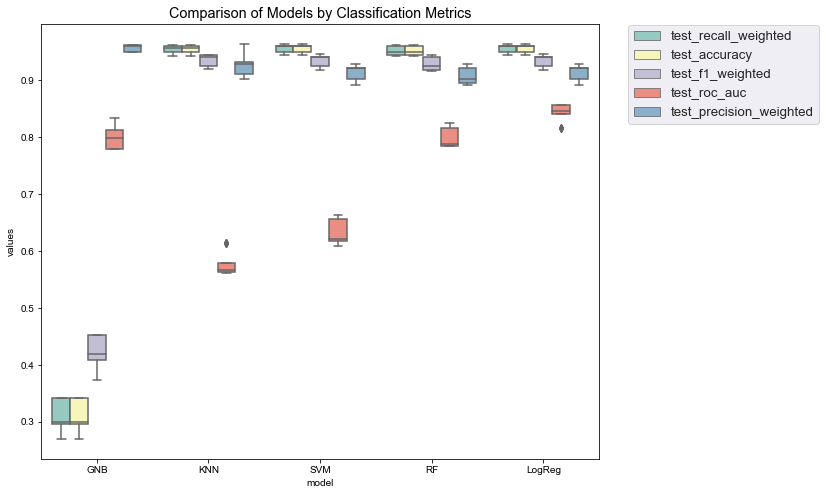

In [5]:
clf_plot_obj = classifiers.ClassificationPlotter(df_encoded, 'stroke')
clf_plot_obj.performance_plot()

No handles with labels found to put in legend.


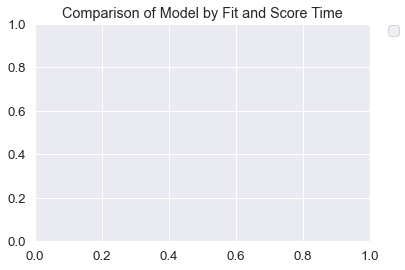

In [6]:
clf_plot_obj.time_metrics_plot()

In [7]:
clf_plot_obj.extended_performance_metrics()

test_precision_weighted           test_roc_auc           test_accuracy  \
                           std      mean          std      mean           std   
model                                                                           
GNB                   0.006064  0.956993     0.020853  0.802047      0.027285   
KNN                   0.020327  0.928532     0.019678  0.577908      0.007112   
LogReg                0.013308  0.914184     0.013248  0.844811      0.006973   
RF                    0.015063  0.909592     0.016144  0.799857      0.007773   
SVM                   0.013581  0.912042     0.021054  0.630923      0.007123   

                 test_recall_weighted           test_f1_weighted            
            mean                  std      mean              std      mean  
model                                                                       
GNB     0.305455             0.027285  0.305455         0.029522  0.416761  
KNN     0.953773             0.007112  0.953773         0.010590  0.934456  
LogReg  0.956105             0.006973  0.956105         0.010295  0.934663  
RF      0.952328             0.007773  0.952328         0.011571  0.930454  
SVM     0.954983             0.007123  0.954983         0.010512  0.933006

In [8]:
clf_plot_obj.extended_time_metrics()

fit_time           score_time          
             std      mean        std      mean
model                                          
GNB     0.000683  0.003064   0.001525  0.008935
KNN     0.000392  0.001296   0.023838  0.153855
LogReg  0.009695  0.024234   0.001436  0.007848
RF      0.036651  0.353276   0.015753  0.056168
SVM     0.014312  0.112033   0.016395  0.114289